In [3]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
# graph 
# import geopandas as gpd
# import geoplot as gplt
# import geoplot.crs as gcrs


Read The Dataset 

In [4]:
df = pd.read_csv('../data/housing.csv')
# usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))

EDA

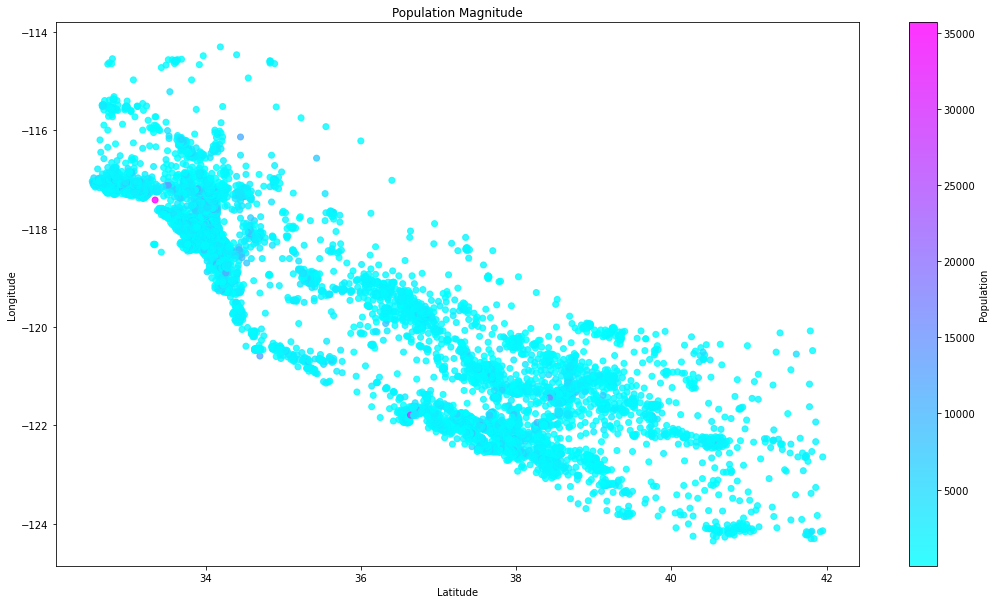

In [5]:
plt.figure(figsize=(18,10))
plt.scatter(df['latitude'],df['longitude'],c=df['population'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Population")
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**Insights:**


Here: 

is the medianhousevalue related to the location ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


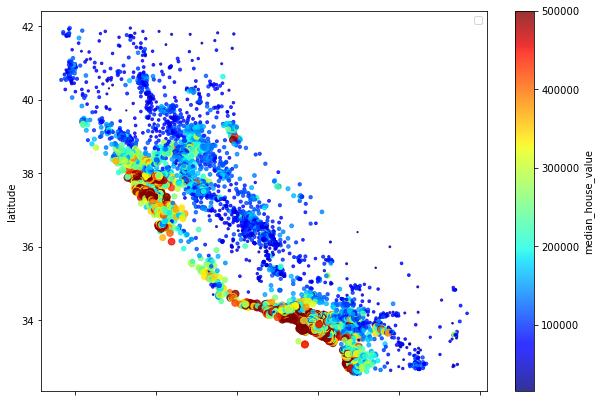

In [6]:

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
s=df["median_house_value"]/10000, figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()


**Insights:**


 we can say yes (close to sea higher pirce )

what is the most common ocean_proximity

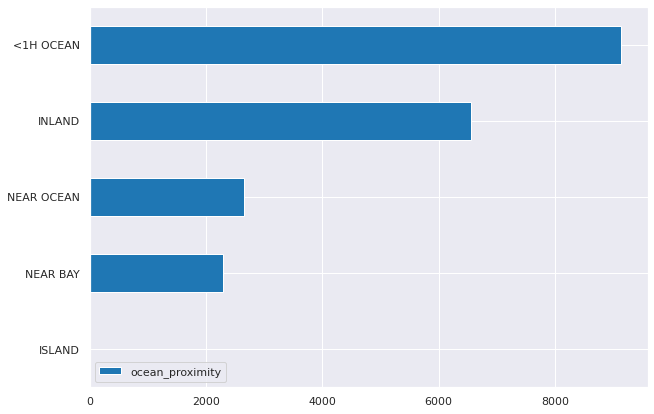

In [ ]:
sns.set(palette='tab10')
df.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.legend()

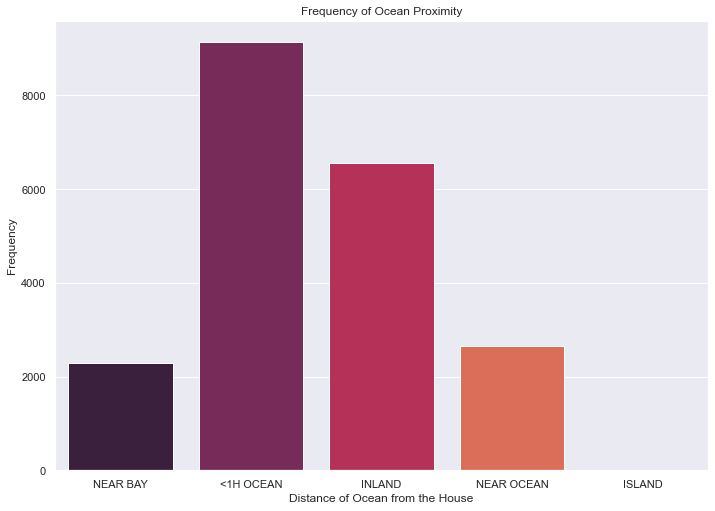

In [12]:
# Frequency of Ocean Proximity
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.countplot(data=df, x="ocean_proximity",  palette="rocket").set(
    title = "Frequency of Ocean Proximity",
    xlabel = "Distance of Ocean from the House",
    ylabel = "Frequency"
)

# Show
plt.show()

**Insights:**


we now know that this graph doesn't need to orednal (or mabey we can order it by how far it is from the sea )

we notice that some of these feature are right skweed 

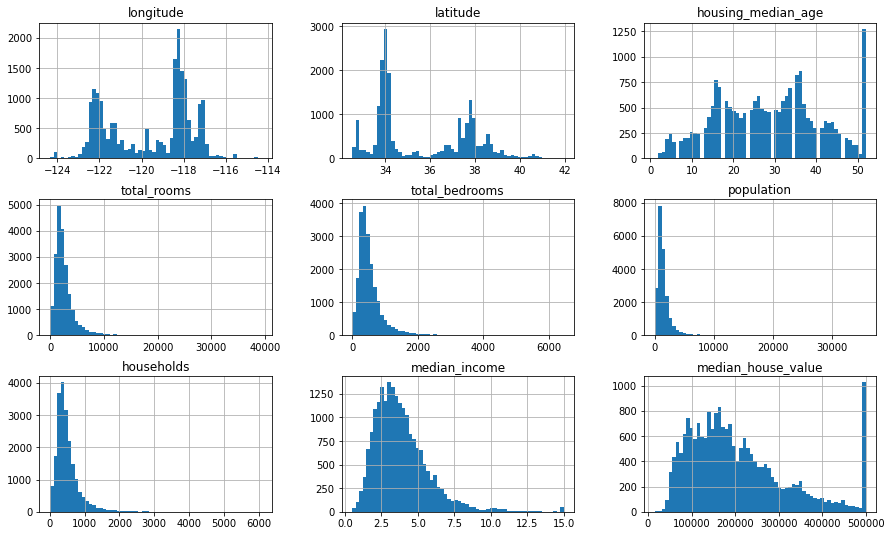

In [ ]:
df.hist(bins=60, figsize=(15,9));plt.show()

In [ ]:
# plotTwo(trdata,['population','median_income'])
# plotTwo(trdata,['housing_median_age','median_house_value'])
# del trdata['geometry']

here we can provide a two graph one bedore the filling the data and other after filing so we can say that the fraph didn't change event after we filling with the mean

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

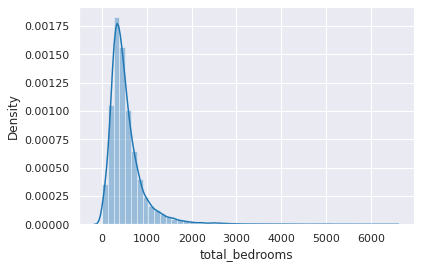

In [ ]:
sns.distplot(df['total_bedrooms']) 

In [ ]:
df['total_bedrooms'].isna().sum()

0

In [ ]:
from math import floor




537

In [ ]:
# from pickle import TRUE


df['total_bedrooms'].fillna(floor(df['total_bedrooms'].mean()) , inplace=True)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

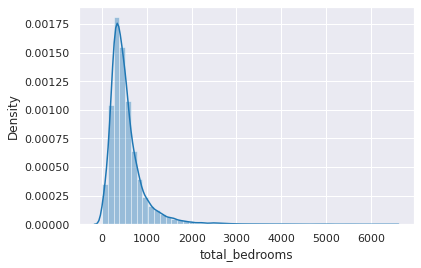

In [ ]:
sns.distplot(df['total_bedrooms']) 


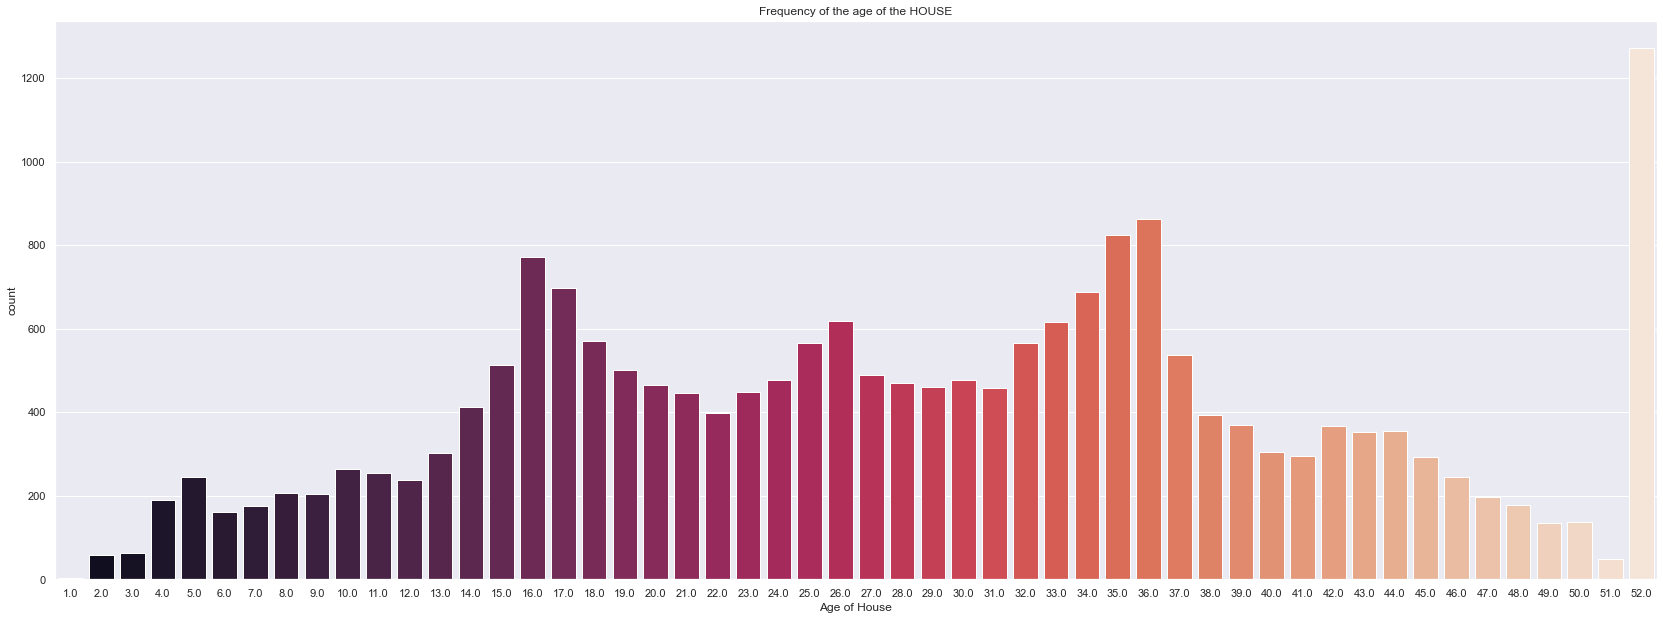

In [7]:
# Frequency of the age of the HOUSE
sns.set(rc={'figure.figsize':(28.7,10.27)})

# Plot
sns.countplot(data=df, x="housing_median_age",  palette="rocket").set(
    title = "Frequency of the age of the HOUSE",
    xlabel = "Age of House"
)

# Show
plt.show()

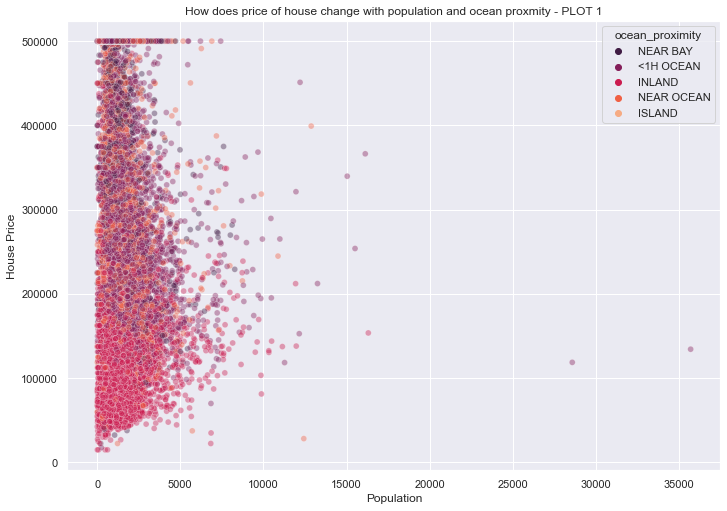

In [9]:
# The relation between the Ocean Proximity and Population - PLOT 1
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plot
sns.scatterplot(data=df, x="population", y="median_house_value", hue="ocean_proximity", palette="rocket", alpha=0.4).set(
    title = "How does price of house change with population and ocean proxmity - PLOT 1",
    xlabel = "Population",
    ylabel = "House Price"
)
# Show 
plt.show()


**Insights:**

We obeserve that most of the houses are Inland, with a price between 30,000 to 160,000. Most of the near bay and <1H Ocean as well as Near Ocean are around 300,000-500,000. Island seems to be in every price range.


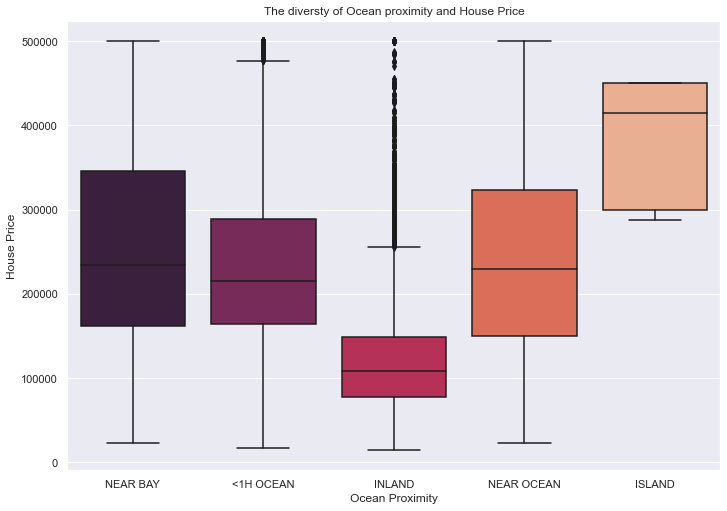

In [10]:
# The diversty of Ocean proximity and House Price
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(x='ocean_proximity',y='median_house_value',data=df, palette="rocket").set(
    title = "The diversty of Ocean proximity and House Price",
    xlabel = "Ocean Proximity",
    ylabel = "House Price"
)

# Show
plt.show()

Explored the correlation and relationship between different data columns.


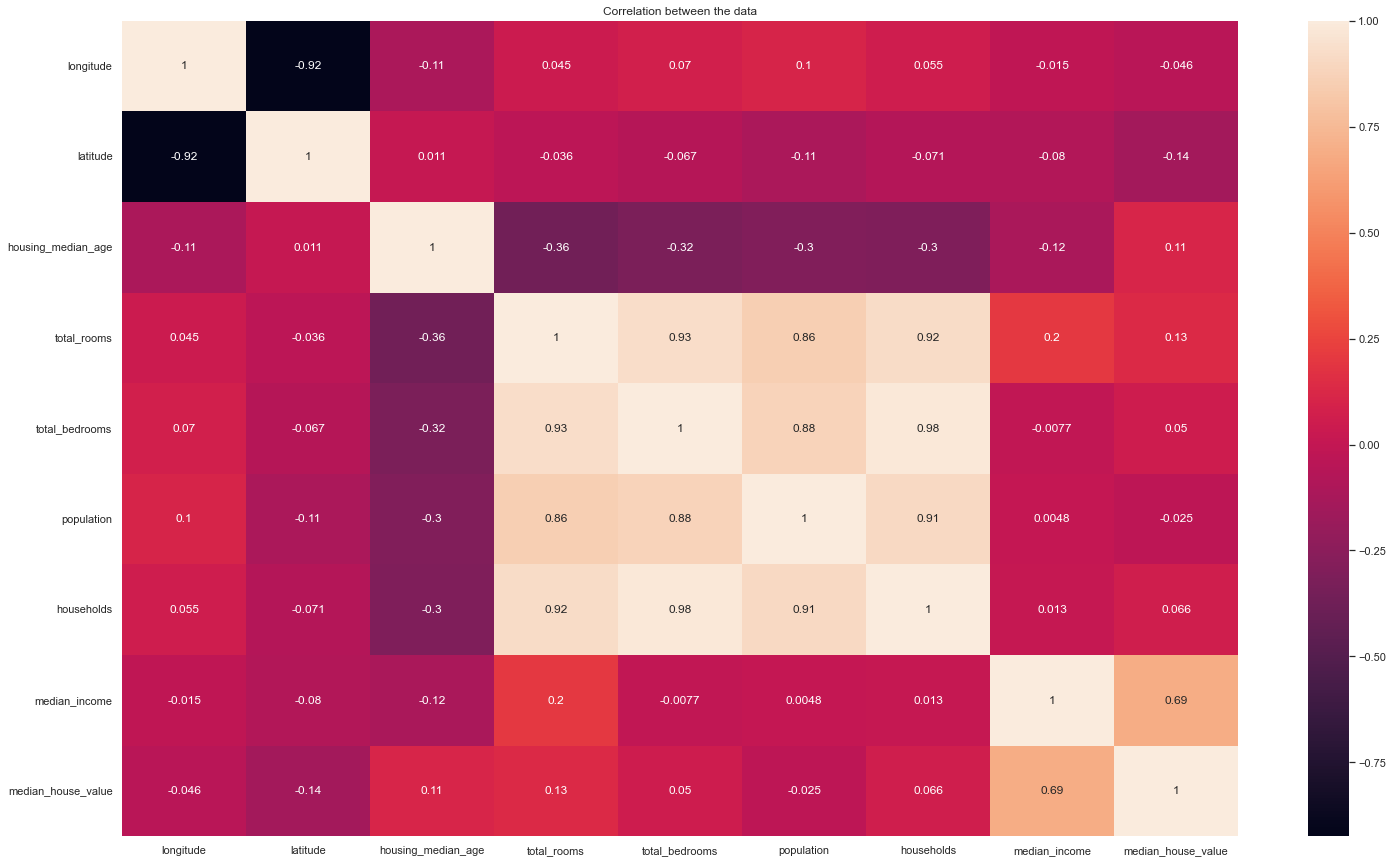

In [13]:
# Heatmap for obeserving correlations
plt.figure(figsize=(25,15))
california_heatmap = df.corr()

# Ploty 
sns.heatmap(california_heatmap, annot=True, cmap='rocket').set(
    title = "Correlation between the data"
)

# Show
plt.xticks(rotation=360)
plt.show()